# Day 08. Exercise 04
# Regression

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn import linear_model, metrics
from matplotlib import pyplot as plt
from collections import Counter

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [2]:
df = pd.read_csv('../data/checker_regression.csv')
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,NaN
1,user_1,62,28.0,NaN
2,user_1,62,28.0,NaN
3,user_1,62,28.0,NaN
4,user_1,62,28.0,NaN
...,...,...,...,...
72,user_31,128,NaN,-104.75
73,user_4,40,NaN,-175.60
74,user_6,15,NaN,-62.60
75,user_7,8,NaN,-115.50


In [3]:
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          77 non-null     object 
 1   num_commits  77 non-null     int64  
 2   pageviews    77 non-null     float64
 3   AVG(diff)    77 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [4]:
df = df.groupby('uid').agg({'num_commits': 'sum','pageviews': 'sum','AVG(diff)': 'first'}).reset_index()
df=df.drop('uid',axis=1)
df

,num_commits,pageviews,AVG(diff)
0,372,168.0,0.000000
1,120,534.0,0.000000
2,7,0.0,-2.000000
3,86,0.0,-89.000000
4,52,0.0,-48.500000
5,244,572.0,0.000000
6,23,0.0,-17.500000
7,41,0.0,-39.333333
8,306,282.0,0.000000
9,20,12.0,0.000000


In [5]:
X = df.drop('AVG(diff)', axis=1).values
y = df['AVG(diff)']
sc = StandardScaler()
sc.fit(X, y)
X = sc.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=21)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [6]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    rmse_list = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
        rmse_list.append(rmse_test)
        print(f"train - {rmse_train} | test - {rmse_test}")
    avg_rmse = np.mean(rmse_list)
    print(f"\nAverage RMSE on crossval is {avg_rmse}")

In [7]:
model = linear_model.LinearRegression()
crossval(10, X, y, model)

train - 56.394029308273375 | test - 56.36260100243834
train - 57.65260395547266 | test - 43.61020544228779
train - 58.29224416241273 | test - 41.398211518611895
train - 54.298882280430306 | test - 71.80917350986782
train - 55.249788013641606 | test - 65.49412959902867
train - 57.30673198537038 | test - 48.00014968189153
train - 58.60994375635353 | test - 39.8040039711902
train - 56.8219029028681 | test - 54.06833069741642
train - 51.02329308193615 | test - 92.80217775694614
train - 56.080653362197964 | test - 61.764916873007714

Average RMSE on crossval is 57.51139000526864


In [8]:
model = DecisionTreeRegressor(random_state=21)
crossval(10, X, y, model)

train - 0.0 | test - 117.17718934888181
train - 0.0 | test - 79.5333147061541
train - 0.0 | test - 0.0
train - 0.0 | test - 78.98656472722058
train - 0.0 | test - 101.36705213854874
train - 0.0 | test - 35.38836908740875
train - 0.0 | test - 0.0
train - 0.0 | test - 69.81014730443323
train - 0.0 | test - 117.52949078296776
train - 0.0 | test - 40.58792924010783

Average RMSE on crossval is 64.03800573357229


In [9]:
model = RandomForestRegressor()
crossval(10, X, y, model)

train - 21.720886625825518 | test - 90.53337057073571
train - 24.026827474676384 | test - 77.62344579013062
train - 26.144725176536557 | test - 20.96387333803878
train - 24.8633664460584 | test - 52.441311367689515
train - 25.399053506491935 | test - 79.29543809586283
train - 23.941702261323698 | test - 52.146915686019376
train - 24.55515687252249 | test - 1.814323220928399
train - 25.5111164835485 | test - 56.14147513928373
train - 21.05595691389562 | test - 95.1256090660406
train - 28.16050754312533 | test - 18.462141113641113

Average RMSE on crossval is 54.45479033883707


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

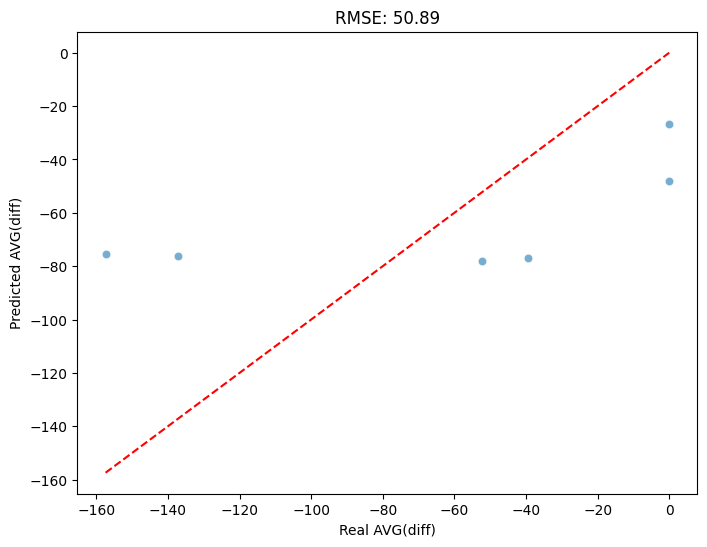

In [10]:
def plot_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Real AVG(diff)')
    plt.ylabel('Predicted AVG(diff)')
    plt.title(f'RMSE: {rmse:.2f}')
    plt.show()
model = LinearRegression()
model.fit(X_train, y_train)
plot_predictions(model, X_test, y_test)

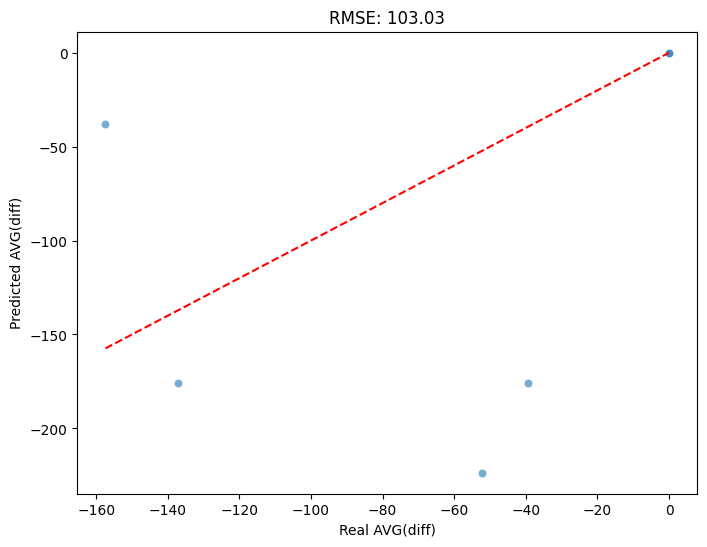

In [11]:
model = DecisionTreeRegressor(random_state=21, max_depth=4)
model.fit(X_train, y_train)
plot_predictions(model, X_test, y_test)

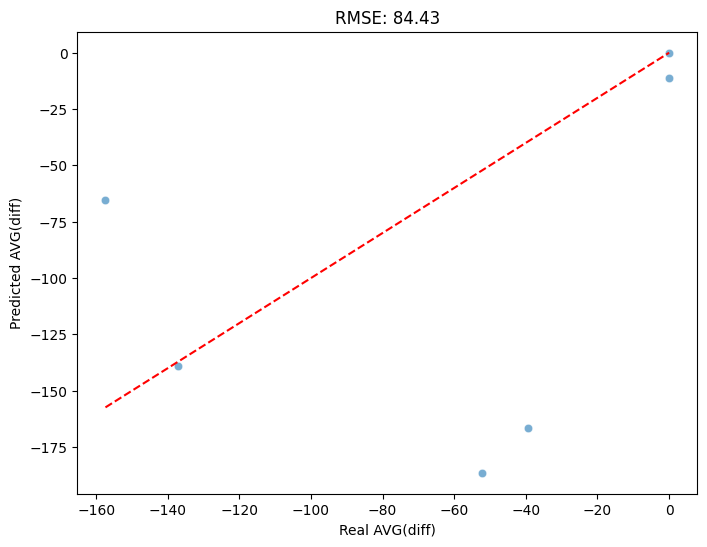

In [12]:
model = RandomForestRegressor(random_state=21, n_estimators=100, max_depth=25)
model.fit(X_train, y_train)
plot_predictions(model, X_test, y_test)

### How would plot look like in the ideal case? The answer: all points lie on the line y = x, RMSE = 0 (no errors).